# Proyecto de Micros

En este proyecto se buscará entrenar una red neuronal para reconocer el rostro de una persona, así como la presencia de objetos que pueden interferir en la detección de un rostro como lo son las mascarillas y las gorras.

## Reconocimiento Facial

Como referencia se utiliza el proyecto desarrollado en el siguiente video:
https://www.youtube.com/watch?v=csYkGeJ5bCM&list=WL&index=12

Primero se realiza la toma de datos

In [1]:
#Primero se instala librería de opencv
!pip install opencv-python
#luego se instala sklearn
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in ./.local/lib/python3.8/site-packages (1.1.3)


In [2]:
#Se importan las librerías
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import tensorflow as tf
import cv2 #OpenCV

2022-12-05 21:17:57.886293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 21:17:57.987837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-05 21:17:57.987856: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-05 21:17:58.011166: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-05 21:17:58.487127: W tensorflow/stream_executor/platform/de

In [3]:
#Se lee una imagen de ejemplo
imagen = cv2.imread("../juan/Pictures/foto1.jpg")

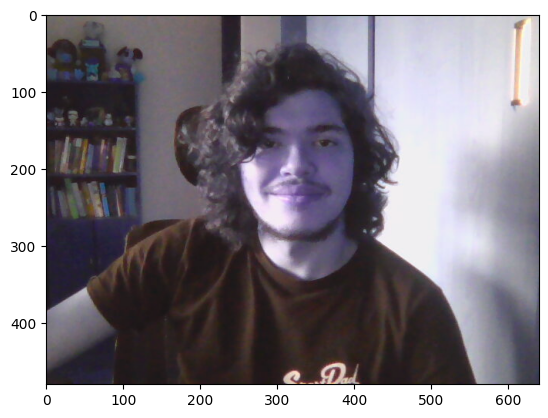

In [4]:
#Se procede a mostrar la imagen
plt.imshow(imagen)

In [5]:
#Para detectar rostros, se partirá del algoritmo de VIola Jones
#https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
#El archivo se guarda como "datos.xml"
rasgos = cv2.CascadeClassifier("../juan/Documents/datos.xml")

In [6]:
#Como ejemplo, se destaca el rostro en la imagen anterior con OpenCV
while True:
    caras = rasgos.detectMultiScale(imagen) #Detecta rostros en la imagen
    for x,y,w,h in caras:
        cv2.rectangle(imagen, (x,y), (x+w, y+h), (255,0,255), 4)
    cv2.imshow("Rostros detectados",imagen)
    if cv2.waitKey(2) == 27: #Si se presiona Escape
        break
cv2.destroyAllWindows()

In [24]:
#Se realiza lo mismo para capturas en tiempo real
#Se almacenan las caras detectadas en un arreglos
#Primero se almacenan datos SIN MASCARILLA
datos = [] #Se buscaran 1000 datos por arreglo
captura = cv2.VideoCapture(0)
while True:
    flag, imagen = captura.read()
    if flag:
        caras = rasgos.detectMultiScale(imagen) #Detecta rostros en la imagen
        for x,y,w,h in caras:
            cv2.rectangle(imagen, (x,y), (x+w, y+h), (255,255,255), 3)
            cara = imagen[y:y+h, x:x+w,:]
            cara = cv2.resize(cara, (50,50))#Cambiar el tamaño
            if len(datos)<=1000: #Se buscaran tener 1000 muestras
                datos.append(cara)
            data = im.fromarray(cara)
            data.save('../juan/Pictures/Cara/Cara_'+str(len(datos))+".png")
        cv2.imshow("Rostros detectados",imagen)
        if cv2.waitKey(2) == 27 or len(datos)>=1000: #Si se presiona Escape
            break
captura.release()
cv2.destroyAllWindows()
np.save("cara_visible.npy",datos)

In [8]:
#Ahora se almacenan datos CON MASCARILLA
datos = [] #Se buscaran 1000 datos por arreglo
captura = cv2.VideoCapture(0)
while True:
    flag, imagen = captura.read()
    if flag:
        caras = rasgos.detectMultiScale(imagen) #Detecta rostros en la imagen
        for x,y,w,h in caras:
            cv2.rectangle(imagen, (x,y), (x+w, y+h), (255,255,255), 3)
            cara = imagen[y:y+h, x:x+w,:]
            cara = cv2.resize(cara, (50,50))#Cambiar el tamaño
            if len(datos)<=1000: #Se buscaran tener 1000 muestras
                datos.append(cara)
        cv2.imshow("Rostros detectados",imagen)
        if cv2.waitKey(2) == 27 or len(datos)>=1000: #Si se presiona Escape
            break
captura.release()
cv2.destroyAllWindows()
np.save("mascarilla.npy",datos)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Ahora que se tienen los datos, se procede a desarrollar una red neuronal

In [8]:
#Primero se cargan los datos
cara = np.load("cara_visible.npy")
mascarilla = np.load("mascarilla.npy")
#Los arreglos anteriores tienen 4 dimensiones, como se muestra
cara.shape

(1000, 50, 50, 3)

In [23]:
#Se guardan las imagenes
from PIL import Image as im
for i in range(cara.shape[0]):
    data = im.fromarray(cara[i])
    data.save('../juan/Pictures/Cara/Cara_'+str(i)+".png")

for i in range(mascarilla.shape[0]):
    data = im.fromarray(mascarilla[i])
    data.save('../juan/Pictures/Mascarilla/Mascarilla_'+str(i)+".png")

In [14]:
#Se procede a convertir a dos dimensiones
cara = cara.reshape(1000, 50*50*3)
mascarilla = mascarilla.reshape(1000, 50*50*3)
#Se combinan los datos en un solo arreglo
arreglo = np.r_[cara,mascarilla]
#Ahora es necesario crear las etiquetas
etiquetas = np.zeros(arreglo.shape[0]) #0 indicara las que son sin mascarilla
etiquetas[int(arreglo.shape[0]/2):] = 1.0

In [46]:
#Se declaran las variables de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(arreglo, etiquetas, test_size = 0.25) #Se entrenara con el 75% de datos
pca = PCA(n_components = 15)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred) #precision

0.98

In [47]:
#Se aplica el modelo
nombres = {0:"Cara", 1:"Mascarilla"}
captura = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, imagen = captura.read()
    if flag:
        caras = rasgos.detectMultiScale(imagen) #Detecta rostros en la imagen
        if len(caras)==0:
            print("No hay personas identificadas")
        for x,y,w,h in caras:
            cv2.rectangle(imagen, (x,y), (x+w, y+h), (255,255,255), 3)
            cara = imagen[y:y+h, x:x+w,:]
            cara = cv2.resize(cara, (50,50))#Cambiar el tamaño
            cara = cara.reshape(1,-1)
            cara = pca.transform(cara)
            prediccion = svm.predict(cara)[0]
            n = nombres[int(prediccion)]
            cv2.putText(imagen, n, (x,y), font, 1, (244,250,250),2)
        cv2.imshow("Rostros detectados",imagen)
        if cv2.waitKey(2) == 27: #Si se presiona Escape
            break
captura.release()
cv2.destroyAllWindows()

No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas
No hay personas identificadas


In [18]:
#Es necesario hacerlo para TensorFlow
#Los datos de entrada corresponden a la entrada arreglo
#Los datos de salida son equivalentes a las etiquetas
inputs = arreglo
outputs = etiquetas

#Se randomizan los vectores

num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [27]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(150, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(50, activation='softmax')) # softmax
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=100, batch_size=1, validation_data=(inputs_validate, outputs_validate))
model.summary()

Epoch 1/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.4880 - mae: 0.4880 - val_loss: 0.5168 - val_mae: 0.5168
Epoch 2/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.4880 - mae: 0.4880 - val_loss: 0.5168 - val_mae: 0.5168
Epoch 3/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.4880 - mae: 0.4880 - val_loss: 0.5168 - val_mae: 0.5168
Epoch 4/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.4880 - mae: 0.4880 - val_loss: 0.5168 - val_mae: 0.5168
Epoch 5/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.4880 - mae: 0.4880 - val_loss: 0.5168 - val_mae: 0.5168
Epoch 6/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.4880 - mae: 0.4880 - val_loss: 0.5168 - val_mae: 0.5168
Epoch 7/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.4880 - mae: 0.4880 - val_loss: 0.5168 - val_mae: 0.5168
Epoch 8/100
1200/1200 [==============================] 

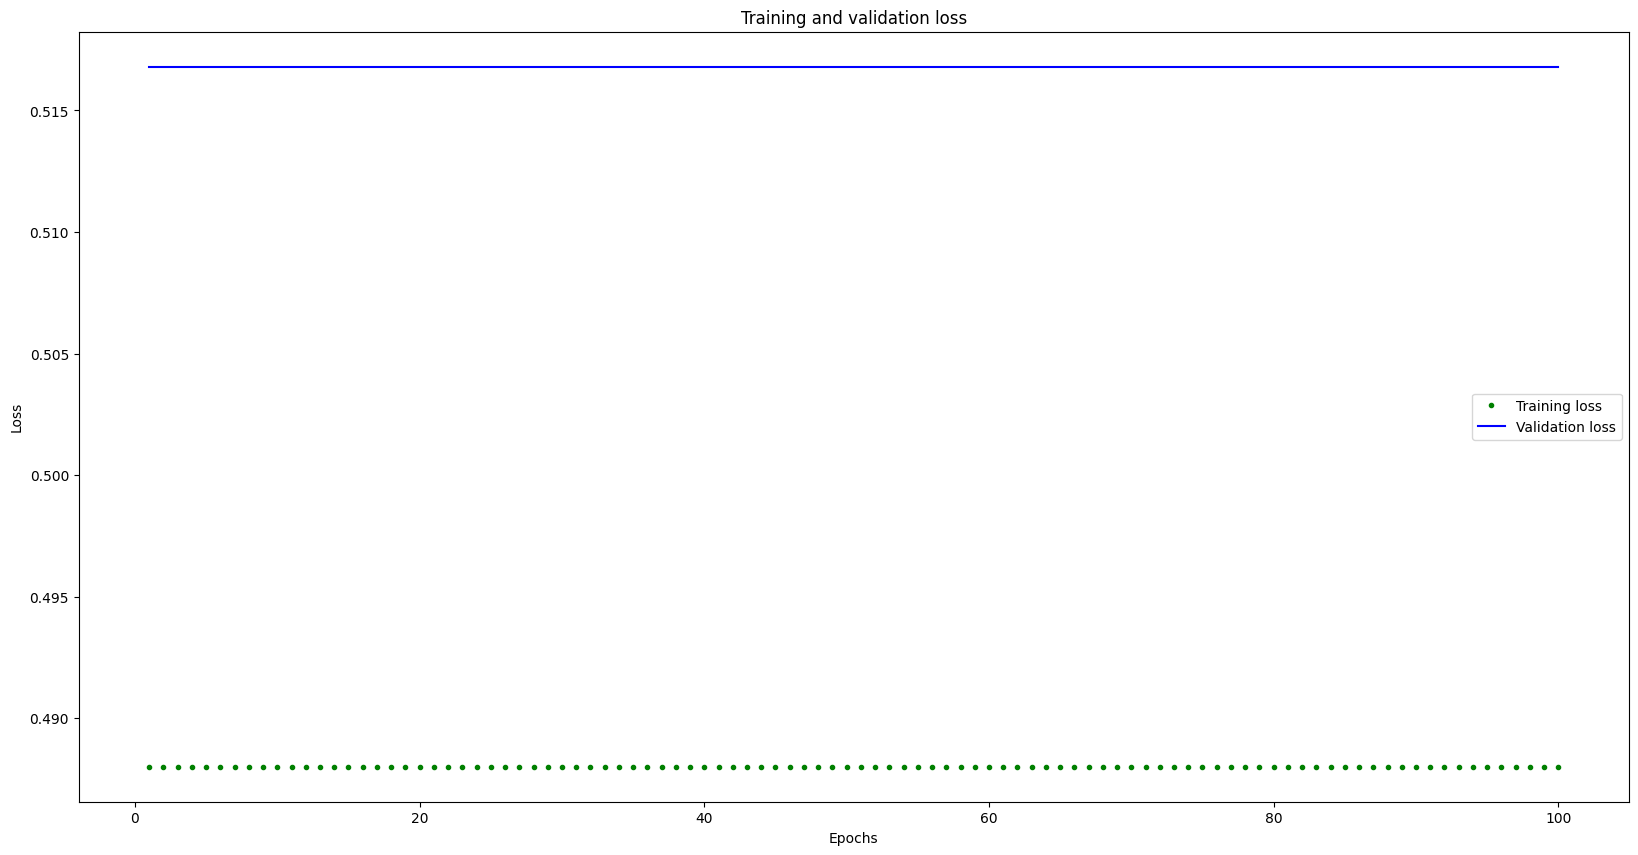

[20.0, 10.0]


In [28]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

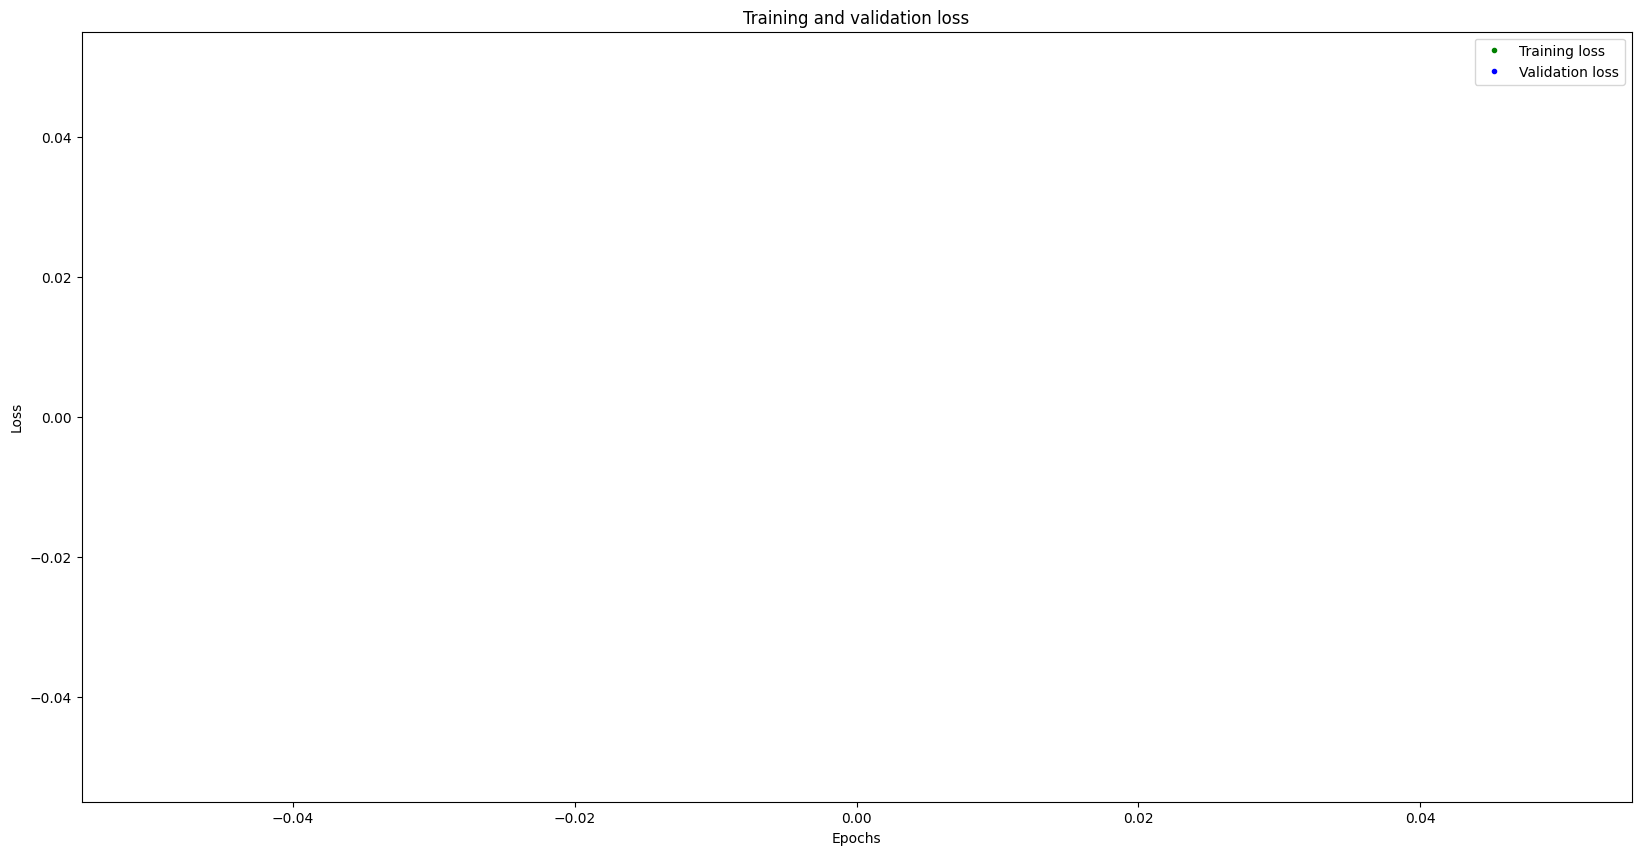

In [29]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
import sklearn as sk
import seaborn as sns
from sklearn import metrics

#Run with test data
# use the model to predict the test inputs
predictions = model.predict(inputs_test)
GESTURES = [
    "cara",
    "mascarilla"
]
# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)


13/13 [==============================] - 0s 2ms/step
predictions =
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
actual =
 [1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.